# Taller de Datos Abiertos

**Nivel : Medio**

Este Jupyter Notebook es para aprender conceptos básicos de la ciencia de datos utilizando la plataforma Datos Abiertos de Cali, Colombia. En este libro aprenderá cómo:
- Recopilar datos de una API
- Datos limpios
- Visualizar y trazar datos
- Crea un visual genial de datos

<hr/>

# 1. Obtener Los Datos


- Queremos este conjunto de datos : [Homicidios comunes en el Municipio de Santiago de Cali](http://datos.cali.gov.co/dataset/homicidios-comunes-en-el-municipio-de-santiago-de-cali-segun-comuna-del-hecho-2001-2017/resource/670f2cd8-3b5f-4657-a136-577afefc38be)

- Podemos usar la **API** para recopilar los datos. El *API Endpoint* es esto:

http://datos.cali.gov.co/en/api/3/action/datastore_search?resource_id=670f2cd8-3b5f-4657-a136-577afefc38be

In [1]:
#Library para usar APIs
import requests
import json
#API Endpoint (de la plataforma de Datos Abiertos)
url = 'http://datos.cali.gov.co/en/api/3/action/datastore_search?resource_id=670f2cd8-3b5f-4657-a136-577afefc38be'

### Usa la API y obtén una respuesta en json
(indicio: mira el documentación de <a href='https://realpython.com/python-requests'>requests</a>)

In [2]:
#usa la api y obtén una respuesta
response = requests.request("GET", url)
#cambiar la respuesta en un objeto json


In [3]:
#mira el objecto json


<hr/>

# 2. Limpiar Los Datos

In [4]:
import pandas as pd

### Crear un DataFrame con el objecto de json y limpialo

- **Usa la <a href='https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html'>library para dataframes con pandas</a>**

- En el fin, el DataFrame debería verse así :

In [5]:
#no usa esta csv, es solo para ver cómo deben verse sus datos cuando termine de limpiarlos
pd.read_csv('datosLimpios.csv').head()

,No,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,1,39,29,46,2,26,27,25,27,46,57,47,42,54,39,26,27
1,2,46,66,57,43,50,51,39,50,49,49,27,37,29,33,26,33
2,3,83,79,83,64,75,54,58,53,65,66,44,43,40,38,41,42
3,4,76,82,76,69,63,74,46,44,73,38,56,44,45,32,34,31
4,5,31,23,45,80,25,27,25,26,27,26,23,39,19,20,19,18


In [6]:
# crear un 'DataFrame' objecto desde el json
# puedes usar json['result']['records'] para ver la información que queremos


### Limpiando los datos, necesitas hacer :
- establece el indice a 'comuna'
- omitir las filas de 'TOTAL' y 'sin especificar'
- cambiar columnas para ser el año
- cambiar el DataFrame para todo ser numérico
- reemplazar los datos faltantes con -1
- ordenar el DataFrame

In [8]:
#LIMPIANDO LOS DATOS
#Terminar la función:
def limpiarLosDatos(datos):
    #establece el indice para ser el numero de comuna
    datos.set_index('No', inplace=True)
    #omitir filas innecesarias
    datosLimpios = datos.loc[["1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12", "13", "14", "15", "16", "17", "18", "19", "20", "21", "22"]]
    #omitir columnas innecesarias
    datosLimpios.drop("_id", axis=1, inplace=True)
    #cambiar columnas para ser el año

    #cambiar los valores de columnas para que sean numéricos (puede usar pd.to_numeric)
    
    #reemplazar los datos faltantes con -1

    #cambiar los valores para que sean numéricos (puede usar pd.to_numeric)

    #ordenar el dataframe por año

    return datosLimpios

In [10]:
#usa la función para limpiar los datos
#guarda la resulta en un variable


<hr/>

# 3. Visualizar los Datos
*(indicio: usa la plot() function para DataFrames en pandas)*

In [11]:
#con esto, podemos visualizar en el Jupyter notebook
%matplotlib inline
import matplotlib.pyplot as plt

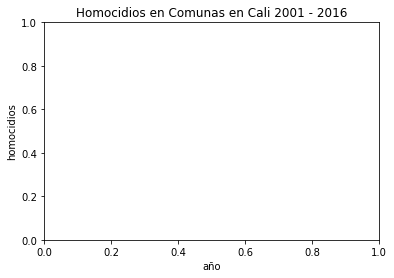

In [13]:
#primero, visualiza todos los datos (usa la función .T para transponer los datos para trazarlos correctamente.)

#título y nombres de ejes
plt.title('Homocidios en Comunas en Cali 2001 - 2016')
plt.xlabel('año')
plt.ylabel('homocidios')

In [15]:
#la comuna con mucho mas homocidios de otros es numero 13, lo visualizamos :
#tambien, usa la función .T para transponer los datos trazarlos correctamente


<hr/>

# 4. Mapear los Datos

Para este conjunto de datos, es bueno visualizar los homicidios a lo largo del tiempo, pero es aún más interesante ver dónde están en un mapa. Ahora usaremos la biblioteca de [geopandas](http://geopandas.org/) para crear un mapa de homicidios de Cali.

In [16]:
import geopandas as gpd
caliShapeFileUrl = 'http://ws-idesc.cali.gov.co:8081/geoserver/idesc/ows?service=WFS&version=1.0.0&request=GetFeature&typeName=idesc:mc_comunas&maxFeatures=50&outputFormat=SHAPE-ZIP'

** Usa la función [read_file()](http://geopandas.org/io.html) de geopandas para obtener un geoDataFrame con el shapefile de Cali : **

In [17]:
caliShape = gpd.read_file(caliShapeFileUrl)
caliShape.head()

,comuna,nombre,zona_recol,area,perimetro,geometry
0,21,Comuna 21,EMAS,4828926.999,16149.224,"POLYGON ((1066474.564146134 872996.1840793319,..."
1,15,Comuna 15,EMAS,4060432.724,10425.092,"POLYGON ((1065485.170884323 869864.0966397388,..."
2,20,Comuna 20,CIUDAD LIMPIA,2439498.349,8448.577,"POLYGON ((1058422.146283313 870975.0254123217,..."
3,1,Comuna 1,CIUDAD LIMPIA,3842242.577,15518.149,"POLYGON ((1054966.676632802 874099.4449846093,..."
4,3,Comuna 3,CIUDAD LIMPIA,3704462.889,11003.318,"POLYGON ((1061757.367971685 874615.5337885239,..."


** Usa la función [plot()](http://geopandas.org/gallery/plotting_with_geoplot.html) de geopandas para ver Cali : **

### Siguiente
*Chevre!* Ahora, tenemos un DataFrame con la información de homocidios por comuna por año en Cali, y también tenemos un DataFrame con las formas de las comunas en Cali en una mapa. Unámoslos para hacer una visual interesante!

Vamos a utilizar la función [join()](https://pandas.pydata.org/pandas-docs/version/0.24.2/reference/api/pandas.DataFrame.join.html) de pandas para hacer esto.

** Primero: restructura el DataFrame de homocidios para ser compatible con los datos de mapa: **
- Cambie el nombre de su DataFrame de antes a ser datosLimpios y puede usar el siguiente código para ayudarlo

In [19]:
#nombreAntes = datosLimpios
datosLimpios.reset_index(inplace=True)
datosLimpios = datosLimpios.apply(pd.to_numeric)
datosLimpios.set_index('No')
datosLimpios.index.names=['comuna']
datosLimpios.head()

NameError: name 'datosLimpios' is not defined

** Segundo: resetructura el DataFrame de Cali ShapeFile para tener 'comuna' para el índice **

In [20]:
#establecer el índice para ser el número de la comuna
caliShape.set_index('comuna', inplace=True)

** Tercero: Usa la función [join()](https://pandas.pydata.org/pandas-docs/version/0.24.2/reference/api/pandas.DataFrame.join.html) de pandas para fusionar los DataFrames **

In [21]:
#Esta función es para hacer que el mapa se vea bonito
def personalizaLaMapa(vmin, vmax):
    # quitar el eje
    ax.axis('off')

    # título
    ax.set_title('Número de homicidios en 2001 por distrito en Cali', \
                  fontdict={'fontsize': '25',
                            'fontweight' : '3'})

    # fuente de los datos
    ax.annotate('Source: Datos Abiertos, Alcaldía de Cali',
               xy=(0.1, .08), xycoords='figure fraction',
               horizontalalignment='left', verticalalignment='top',
               fontsize=10, color='#555555')

    # Crear una barra de colores como la leyenda del mapa
    sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
    sm._A = []
    cbar = fig.colorbar(sm)

** Trata de usar la función de [plot()](http://geopandas.org/gallery/plotting_with_geoplot.html) en geopandas para visualiza todos en el mapa de Cali : **
- primero, solo por un año
- usa la función 'personalizaLaMapa' para hacer que el mapa se vea bonito
- despues, guarda la figure en una imagen de png con la función [savefig()](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.savefig.html)

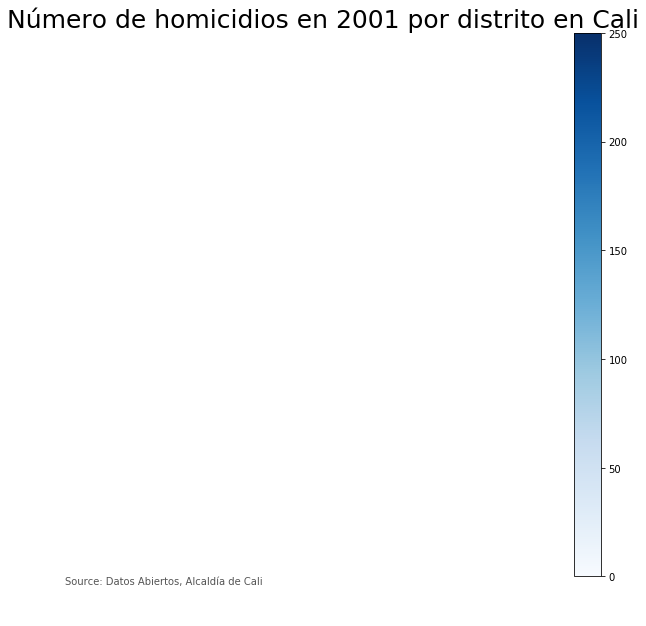

In [24]:
#el año (year) que queremos ver
year = 2001
vmin, vmax = 0, 250

#crear una figura en matplotlib
fig, ax = plt.subplots(1, figsize=(10, 10))

#indicio: termina esto --> plot(column= , cmap='Blues, ax=)

# Personalización

personalizaLaMapa(vmin, vmax)

# esto guardará la figura como un png de alta resolución. También puede guardar como svg
# usa la función savefig('nombre.png', dpi=300)


# Buen Trabajo!

Muy genial! Utilizamos datos de la plataforma de [Datos Abiertos, Cali](http://datos.cali.gov.co/) y creamos nuestro propio visual! ¿Qué otros conjuntos de datos geniales podemos utilizar?

![Homocidios](https://media.giphy.com/media/fSRR6jTOJggap5KGS9/giphy.gif "homocidios")

<hr/>

## Fin.

<hr/>